In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
import matplotlib.cm as cm

In [3]:
def print_simple_number(truth_table,object_type):
    total_N = len(truth_table)
    good_N = len(truth_table[truth_table['best_quality']>=2.5])
    very_good_N = len(truth_table[truth_table['best_quality']==4])
    tmp_table = truth_table.loc[truth_table['best_quality']>=2.5]
    number_of_consistent_z = len(tmp_table.loc[abs(tmp_table['best_z']-tmp_table['Redrock_z'])/(1+tmp_table['best_z'])<0.0033])
    
    print('Number of',object_type,':',total_N)
    print('Number of ',object_type,'with quality>=2.5:',good_N, ' | fration=',good_N*1.0/total_N)
    print('Number of ',object_type,'with quality==4:',very_good_N, ' | fration=',very_good_N*1.0/total_N)
    print('Number of ',object_type,'with consistent z (with quality>=2.5):',number_of_consistent_z, '| fraction=',number_of_consistent_z/total_N)
   
    number_star = len(tmp_table.loc[tmp_table['best_spectype']=='STAR'])
    number_galaxy = len(tmp_table.loc[tmp_table['best_spectype']=='GALAXY'])
    number_qso = len(tmp_table.loc[tmp_table['best_spectype']=='QSO'])
    print('---------')  
    print('Fraction of objects with quality>=2.5')
    print('Star:',number_star*1.0/good_N)
    print('Galaxy:',number_galaxy*1.0/good_N)    
    print('QSO:',number_qso*1.0/good_N)

    plt.hist(truth_table['best_quality'],bins=8,range=(0,4))
    plt.ylabel('Number')
    plt.xlabel('Quality')
    plt.yscale('log')
    plt.xlim(0,4)
  

In [4]:
def plot_redshift_distribution(truth_table,object_type):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    x_range = [0,max(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'])]
    plt.hist(truth_table['best_z'],range=(x_range[0],x_range[1]),bins=20,color='b',label='All')
    plt.hist(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'],range=(x_range[0],x_range[1]),bins=20,color='orange',label='quality>=2.5')
    plt.hist(truth_table.loc[truth_table['best_quality']==4]['best_z'],range=(x_range[0],x_range[1]),bins=20,color='g',label='quality=4')
    plt.yscale('log')
    plt.xlabel('Best z')
    plt.ylabel('Number')
    plt.legend()
    plt.title(object_type)
    
    plt.subplot(1,2,2)
    plt.scatter(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'],truth_table.loc[truth_table['best_quality']>=2.5]['Redrock_z'],
                
                c=truth_table.loc[truth_table['best_quality']>=2.5]['best_quality'],cmap=cm.jet)
    plt.xlabel('Best z')
    plt.ylabel('Redrock z')
    plt.colorbar()

In [5]:
def plot_chi2_quality_distribution(truth_table):
    #plt.scatter(truth_table['best_quality'],truth_table['DELTACHI2'])
    #plt.ylim(1,100000)
    #plt.yscale('log')
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.hist(np.log10(truth_table['DELTACHI2']),label='All',bins=8,range=(0,5),color='b')
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']>=2.5]['DELTACHI2']),color='orange',label='flag>=2.5',bins=8,range=(0,5))
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']==4]['DELTACHI2']),color='g',label='flag=4',bins=8,range=(0,5),)
    plt.xlabel('$log_{10}$ delta chi$^{2}$')
    plt.ylabel('Number')
    plt.yscale('log')
    plt.legend()
    plt.subplot(1,2,2)
    
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']<2.5]['DELTACHI2']),color='grey',label='flag<2.5',bins=8,range=(0,5),histtype='step',lw=4)
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']>=2.5]['DELTACHI2']),color='orange',label='flag>=2.5',bins=8,range=(0,5),histtype='step',lw=4)
    #plt.hist(np.log10(truth_table.loc[truth_table['best_quality']==4]['DELTACHI2']),color='g',label='flag=4',bins=8,range=(0,5),histtype='step',lw=4)

    plt.xlabel('$log_{10}$ delta chi$^{2}$')
    plt.ylabel('Number')
    plt.yscale('log')
    plt.legend()    
    
    
    
    

In [6]:
def give_me_ra_dec_object_with_property_cut(truth_table, property_name, cut, if_print=True):
    tmp_table = truth_table.loc[(truth_table[property_name]>=cut[0]) & (truth_table[property_name]<cut[1])]
    if if_print==True:
        for i_object in range(0,len(tmp_table)):
            print(tmp_table['TARGET_RA'].values[i_object],tmp_table['TARGET_DEC'].values[i_object])
    
    return tmp_table

In [7]:
# The filenames are tentative. We will change the filenames.
on_nersc=True
if on_nersc==True:
    dir = '/global/cfs/cdirs/desi/sv/vi/TruthTables/Cascades/'
    BGS = pd.read_csv(dir+'BGS/'+'desi-vi_SV_cascades_combination_BGS_all_210521.csv')
    BGS['DELTACHI2']=BGS['Redrock_deltachi2']
    LRG = pd.read_csv(dir+'LRG/'+'desi-vi_SV_cascades_combination_LRG_all_210521.csv')
    LRG['DELTACHI2']=LRG['Redrock_deltachi2']
    ELG = pd.read_csv(dir+'ELG/'+'desi-vi_SV_cascades_combination_ELG_all_210521.csv')
    ELG['DELTACHI2']=ELG['Redrock_deltachi2']
    #ELG_80606 = pd.read_csv(dir+'ELG/'+'desi-vi_ELG_tile80606_nightdeep_merged_all_210218.csv')
else:
    dir = '/Users/tlan/Dropbox/Astro_Research/Projects_plots_notes/2020_DESI_visual_inspect/SV1/Truth_tables/'
    BGS = pd.read_csv(dir+'desi-vi_BGS_tile80613_nightdeep_merged_all_210202.csv')
    LRG = pd.read_csv(dir+'desi-vi_LRG_tile80609_nightdeep_merged_all_210130.csv')
    ELG_80606 = pd.read_csv(dir+'desi-vi_ELG_tile80606_nightdeep_merged_all_210218.csv')
    ELG_80608 = pd.read_csv(dir+'desi-vi_ELG_tile80608_nightdeep_merged_all_210208.csv')
    ELG_80610 = pd.read_csv(dir+'desi-vi_ELG_tile80610_nightdeep_merged_all_210308.csv')
    #QSO = pd.read_csv('desi-vi_QSO_tile80609_nightdeep_merged_all_210202_ADDING_object_info.csv')

In [8]:
#BGS

In [9]:
BGS

,TARGETID,Redrock_z,best_z,best_quality,Redrock_spectype,best_spectype,all_VI_issues,all_VI_comments,merger_comment,N_VI,Redrock_deltachi2,TILEID,setting_name,DELTACHI2
0,39628422510544676,0.1950,0.19500,4.0,GALAXY,GALAXY,NaN,NaN,none,2,1934.6,80664,sel0,1934.6
1,39628422514741841,0.2579,0.25790,4.0,GALAXY,GALAXY,NaN,NaN,none,2,641.2,80664,sel0,641.2
2,39628422518932837,0.1867,0.18670,4.0,GALAXY,GALAXY,NaN,NaN,none,2,575.6,80664,sel0,575.6
3,39628422518933551,0.2084,0.20840,4.0,GALAXY,GALAXY,NaN,NaN,none,2,731.9,80664,sel0,731.9
4,39628422518935473,0.4163,0.41630,3.5,GALAXY,GALAXY,NaN,NaN,none,2,1242.7,80664,sel0,1242.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,39628516131604165,1.1046,0.16880,4.0,QSO,GALAXY,SCR,a strange flux trough at 6200A<\lambda<9200A O...,none,2,1198.1,80643,sel1,1198.1
1848,39628516131604442,1.1044,0.19575,4.0,QSO,GALAXY,SCR,Oscillation pattern,none,2,2000.9,80643,sel1,2000.9
1849,39628516131604880,1.1044,0.19500,4.0,QSO,GALAXY,SCR,Oscillation pattern,none,2,227.2,80643,sel1,227.2
1850,39628516131604896,1.1117,0.16775,4.0,QSO,GALAXY,SCR,Oscillation pattern,none,2,70.0,80643,sel1,70.0


# BGS main z_deep<0.9 and non-repeatable redshifts

Number of BGS : 1424
Number of  BGS with quality>=2.5: 1412  | fration= 0.9915730337078652
Number of  BGS with quality==4: 1325  | fration= 0.9304775280898876
Number of  BGS with consistent z (with quality>=2.5): 1361 | fraction= 0.9557584269662921
---------
Fraction of objects with quality>=2.5
Star: 0.09490084985835694
Galaxy: 0.8937677053824362
QSO: 0.0113314447592068


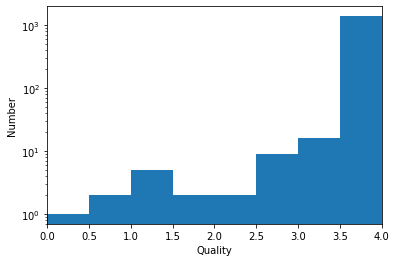

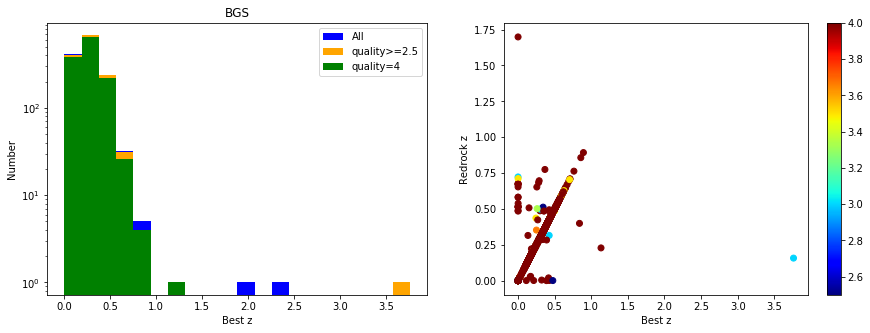

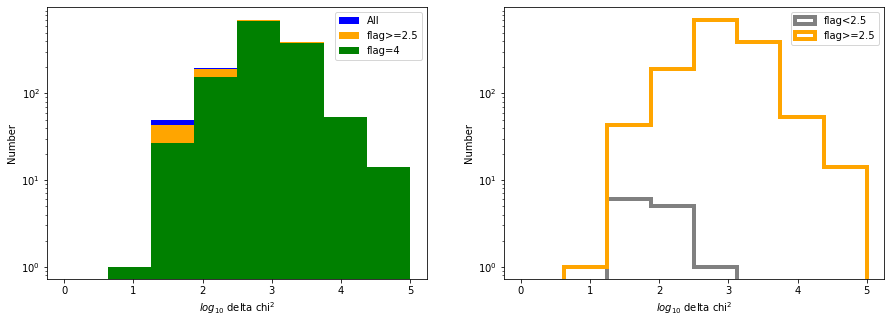

In [10]:
BGS_main = BGS[BGS['setting_name']=='sel0']
print_simple_number(BGS_main,'BGS')
plot_redshift_distribution(BGS_main,'BGS')
plot_chi2_quality_distribution(BGS_main)

# BGS with z_deep>0.9

Number of BGS : 428
Number of  BGS with quality>=2.5: 411  | fration= 0.9602803738317757
Number of  BGS with quality==4: 373  | fration= 0.8714953271028038
Number of  BGS with consistent z (with quality>=2.5): 90 | fraction= 0.2102803738317757
---------
Fraction of objects with quality>=2.5
Star: 0.12895377128953772
Galaxy: 0.6423357664233577
QSO: 0.22871046228710462


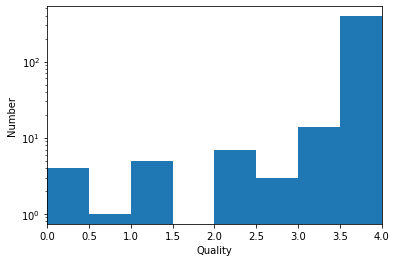

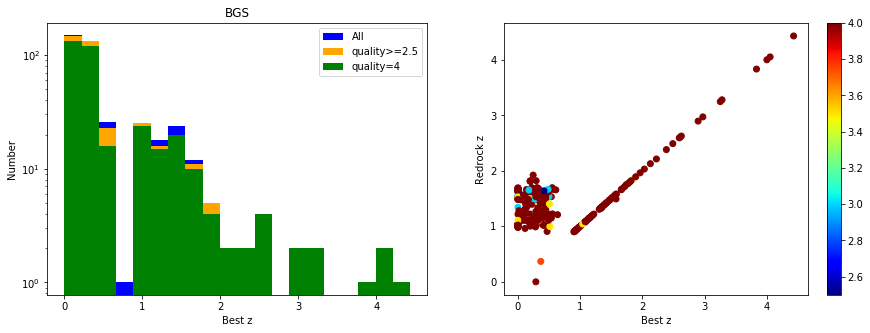

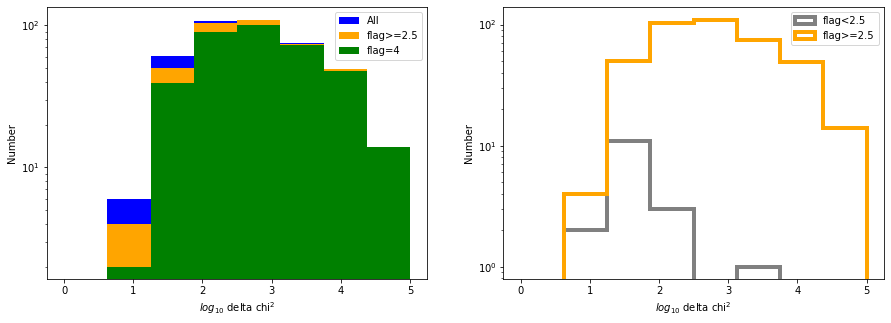

In [13]:
BGS_highz = BGS[BGS['setting_name']=='sel1']
print_simple_number(BGS_highz,'BGS')
plot_redshift_distribution(BGS_highz,'BGS')
plot_chi2_quality_distribution(BGS_highz)

In [14]:
denali_all = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV1/redshift_comps/denali/testdenali/All/alltiles_Allzinfo.fits')

In [15]:
denali_all = denali_all[denali_all['coadd_type']=='cumulative']

In [43]:
new_catalog_denali = denali_all['TARGETID','Z','subset','TILEID','DELTACHI2','TARGET_RA','TARGET_DEC',
                              'EFFTIME_BRIGHT','FIBERFLUX_R','FLUX_R','FIBERFLUX_Z','FLUX_W1','FLUX_G','FLUX_Z','EBV','ZWARN','FIBER'].to_pandas()

In [44]:
catalog_BGS_match = BGS_highz.merge(new_catalog_denali,on='TARGETID',how='left',suffixes=("_cascades","_denali"))

In [45]:
final_match_catalog = catalog_BGS_match[catalog_BGS_match['TILEID_cascades']==catalog_BGS_match['TILEID_denali']]

### Comparing the Denali redshift and the best z

The consistency increases from 20% to 70%!!

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Number of BGS : 408
Number of  BGS with quality>=2.5: 391  | fration= 0.9583333333333334
Number of  BGS with quality==4: 355  | fration= 0.8700980392156863
Number of  BGS with consistent z (with quality>=2.5): 279 | fraction= 0.6838235294117647
---------
Fraction of objects with quality>=2.5
Star: 0.1278772378516624
Galaxy: 0.639386189258312
QSO: 0.23273657289002558


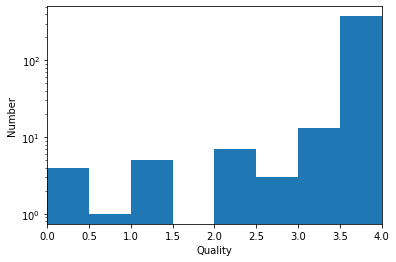

In [46]:
final_match_catalog['Redrock_z']=final_match_catalog['Z']
print_simple_number(final_match_catalog,'BGS')

In [47]:
final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
cut_catalog = final_match_catalog[(final_match_catalog['dz']>0.0033) & (final_match_catalog['best_quality']>=2.5)]

In [51]:
for i in range(0,112):
    print(np.array(cut_catalog['TARGET_RA'])[i],np.array(cut_catalog['TARGET_DEC'])[i])

99.68770745687613 45.71175486995044
97.96785729594103 45.94121523059481
95.59853690966847 46.76216979925484
97.54823604105081 48.70152865778377
167.11219959618535 51.372931857977505
168.22887181297628 51.981545027347416
214.97038490130757 52.021379596780946
259.8192382498188 57.113060242168565
142.78246388469557 64.14859047506995
140.99191619792376 64.39673028673056
141.99552288124084 64.50520730172542
144.4905089883057 65.47523791917281
145.9093560304236 65.52531822411372
147.3446135558291 65.49591617504936
161.98374512430775 81.70633775741342
127.71442914555834 82.15277691997778
137.33955601755483 82.16409128050981
158.91821689318704 82.26270224065615
163.89934082371994 -26.72779787387846
88.20827247018286 -22.73313094011425
66.54640138655705 -6.3364359122691605
31.037631724539814 -5.752029525410941
31.146942843466103 -5.707699103646304
31.801593030899017 -5.771401499492254
31.905840649647924 -5.4706375909811324
65.20700308084606 -4.723586280579886
31.436110491412684 -3.9502539467637